## Ejercicio 4

KS Statistic: 0.0370, p-value: 0.5006


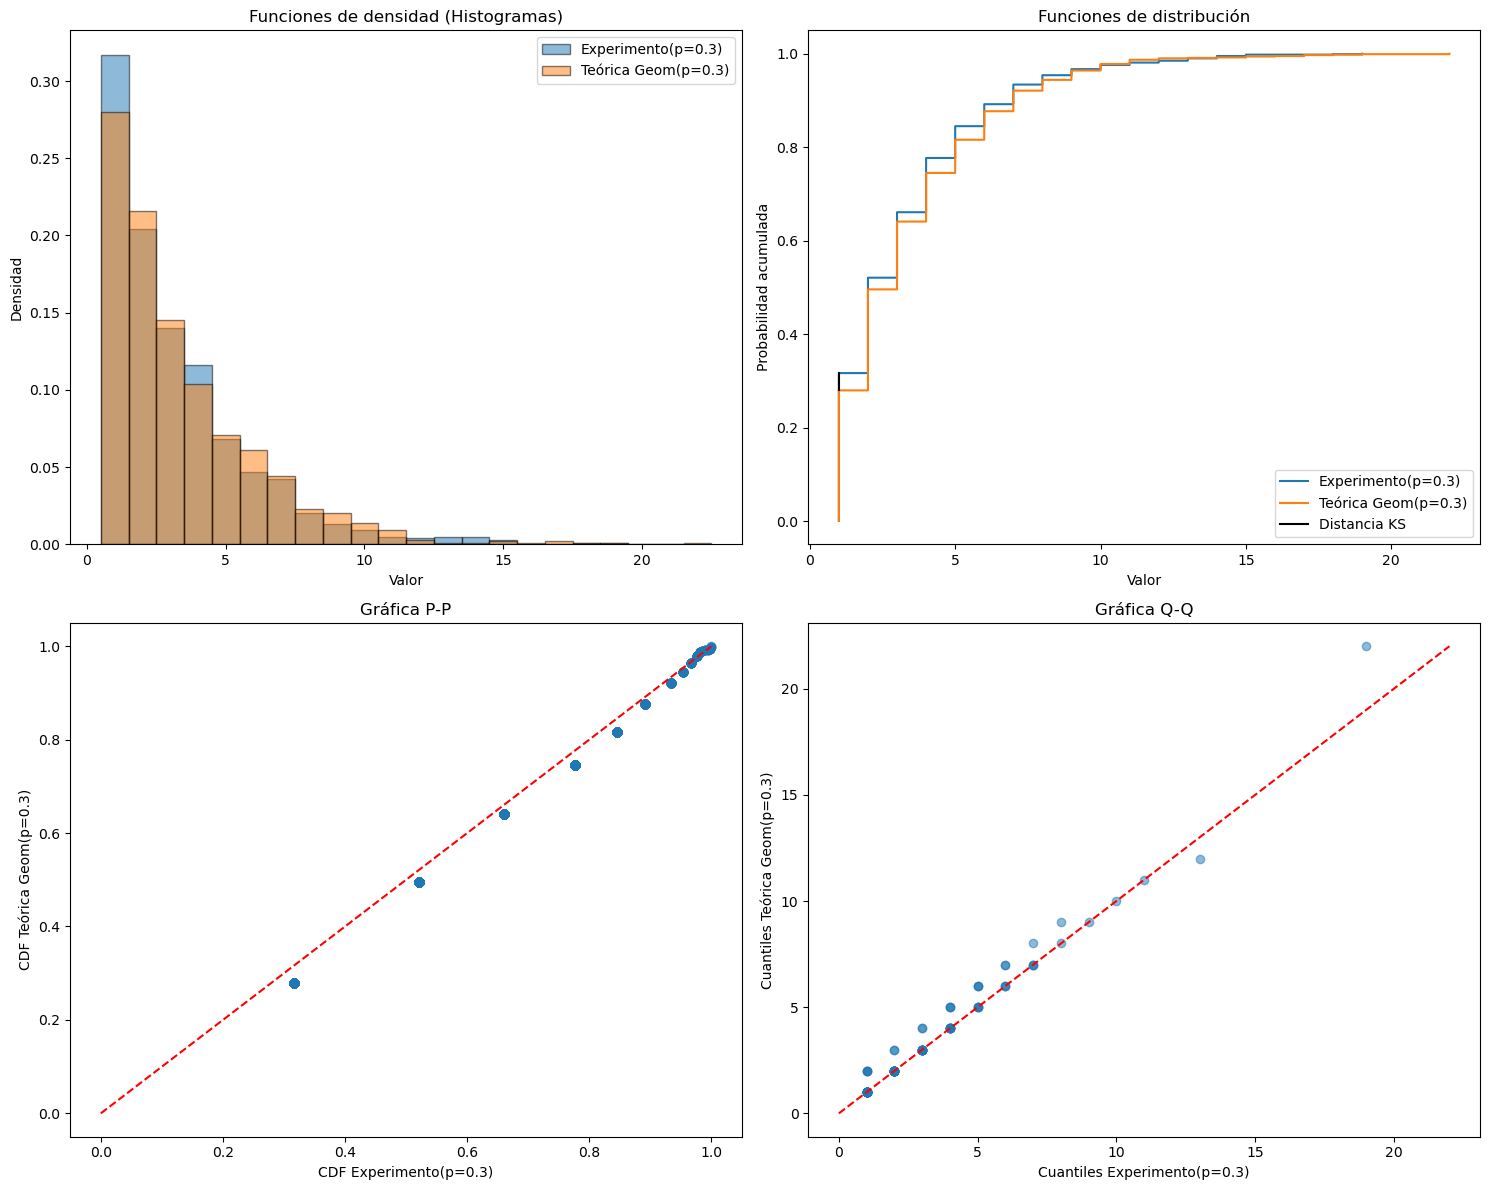

KS Statistic: 0.0810, p-value: 0.0028


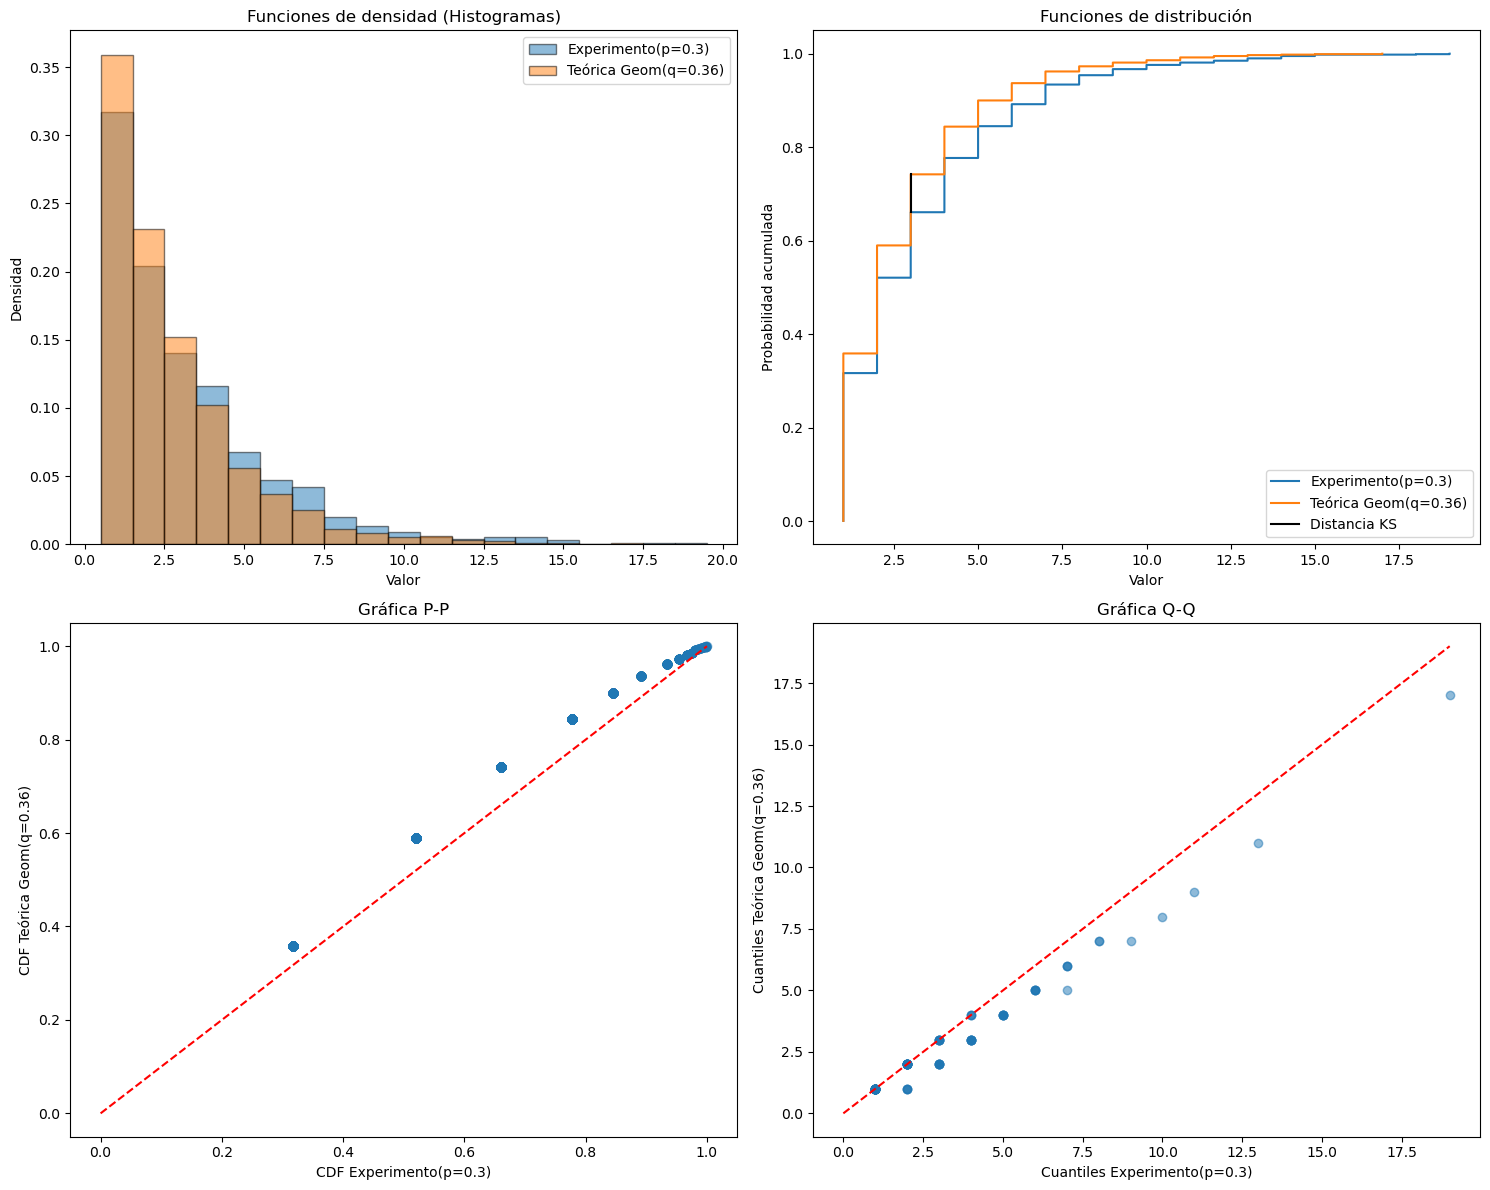

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

def simular_primer_exito(p, N):
    return np.random.geometric(p, size=N)

def comparar_distribuciones(muestra_exp, muestra_teorica, nombre_exp, nombre_teorica):
    ##Compara muestras experimental y teórica con gráficos y test KS.
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # Histogramas de densidad (PMF empírica)
    max_val = max(np.max(muestra_exp), np.max(muestra_teorica))
    bins = np.arange(0.5, max_val + 1.5)
    ax1.hist(muestra_exp, bins=bins, density=True, alpha=0.5, label=nombre_exp, edgecolor='black')
    ax1.hist(muestra_teorica, bins=bins, density=True, alpha=0.5, label=nombre_teorica, edgecolor='black')
    ax1.set_title('Funciones de densidad (Histogramas)')
    ax1.set_xlabel('Valor')
    ax1.set_ylabel('Densidad')
    ax1.legend()
    
    # Funciones de distribución 
    x_exp = np.sort(muestra_exp)
    y_exp = np.arange(1, len(muestra_exp)+1)/len(muestra_exp)
    ax2.step(x_exp, y_exp, where='post', label=nombre_exp)
    
    x_teor = np.sort(muestra_teorica)
    y_teor = np.arange(1, len(muestra_teorica)+1)/len(muestra_teorica)
    ax2.step(x_teor, y_teor, where='post', label=nombre_teorica)
    
    ax2.set_title('Funciones de distribución')
    ax2.set_xlabel('Valor')
    ax2.set_ylabel('Probabilidad acumulada')
    ax2.legend()
    
    # Gráfica PP
    combined = np.concatenate([muestra_exp, muestra_teorica])
    x_eval = np.sort(combined)
    F_exp = np.searchsorted(np.sort(muestra_exp), x_eval, side='right') / len(muestra_exp)
    F_teor = np.searchsorted(np.sort(muestra_teorica), x_eval, side='right') / len(muestra_teorica)
    ax3.scatter(F_exp, F_teor, alpha=0.5)
    ax3.plot([0,1], [0,1], 'r--')
    ax3.set_title('Gráfica P-P')
    ax3.set_xlabel(f'CDF {nombre_exp}')
    ax3.set_ylabel(f'CDF {nombre_teorica}')
    
    # Gráfica QQ
    quantiles_exp = np.quantile(muestra_exp, np.linspace(0,1,100))
    quantiles_teor = np.quantile(muestra_teorica, np.linspace(0,1,100))
    ax4.scatter(quantiles_exp, quantiles_teor, alpha=0.5)
    ax4.plot([0, max_val], [0, max_val], 'r--')
    ax4.set_title('Gráfica Q-Q')
    ax4.set_xlabel(f'Cuantiles {nombre_exp}')
    ax4.set_ylabel(f'Cuantiles {nombre_teorica}')
    
    # Test KS 
    ks_stat, p_value = stats.ks_2samp(muestra_exp, muestra_teorica)
    diff = np.abs(F_exp - F_teor)
    max_idx = np.argmax(diff)
    ax2.plot([x_eval[max_idx]]*2, [F_exp[max_idx], F_teor[max_idx]], 'k-', label='Distancia KS')
    ax2.legend()
    
    plt.tight_layout()
    print(f"KS Statistic: {ks_stat:.4f}, p-value: {p_value:.4f}")
    return fig

N = 1000
p = 0.3
q = min(1.2 * p, 0.99)

muestra_exp = simular_primer_exito(p, N)
muestra_teorica_p = np.random.geometric(p, N)
muestra_teorica_q = np.random.geometric(q, N)

#Geom(p)
comparar_distribuciones(muestra_exp, muestra_teorica_p, f'Experimento(p={p})', f'Teórica Geom(p={p})')
plt.show()

#Geom(q=1.2p)
comparar_distribuciones(muestra_exp, muestra_teorica_q, f'Experimento(p={p})', f'Teórica Geom(q={q:.2f})')
plt.show()

### Ejercicio 5


Resultados de la prueba KS (calculada manualmente):
Estadístico KS: 0.0185
Valor crítico (α=0.05): 0.0911
Conclusión: no rechaza la hipótesis nula (α=0.05)

Resultados de la prueba Chi-cuadrado:
Estadístico χ²: 2.7756
Valor p: 0.9476
Conclusión: no rechaza la hipótesis nula (α=0.05)

Contribuciones individuales al χ²:
Dígito 1: 0.2541
Dígito 2: 0.1900
Dígito 3: 0.0465
Dígito 4: 0.2641
Dígito 5: 0.1556
Dígito 6: 0.0578
Dígito 7: 0.7277
Dígito 8: 1.0176
Dígito 9: 0.0621


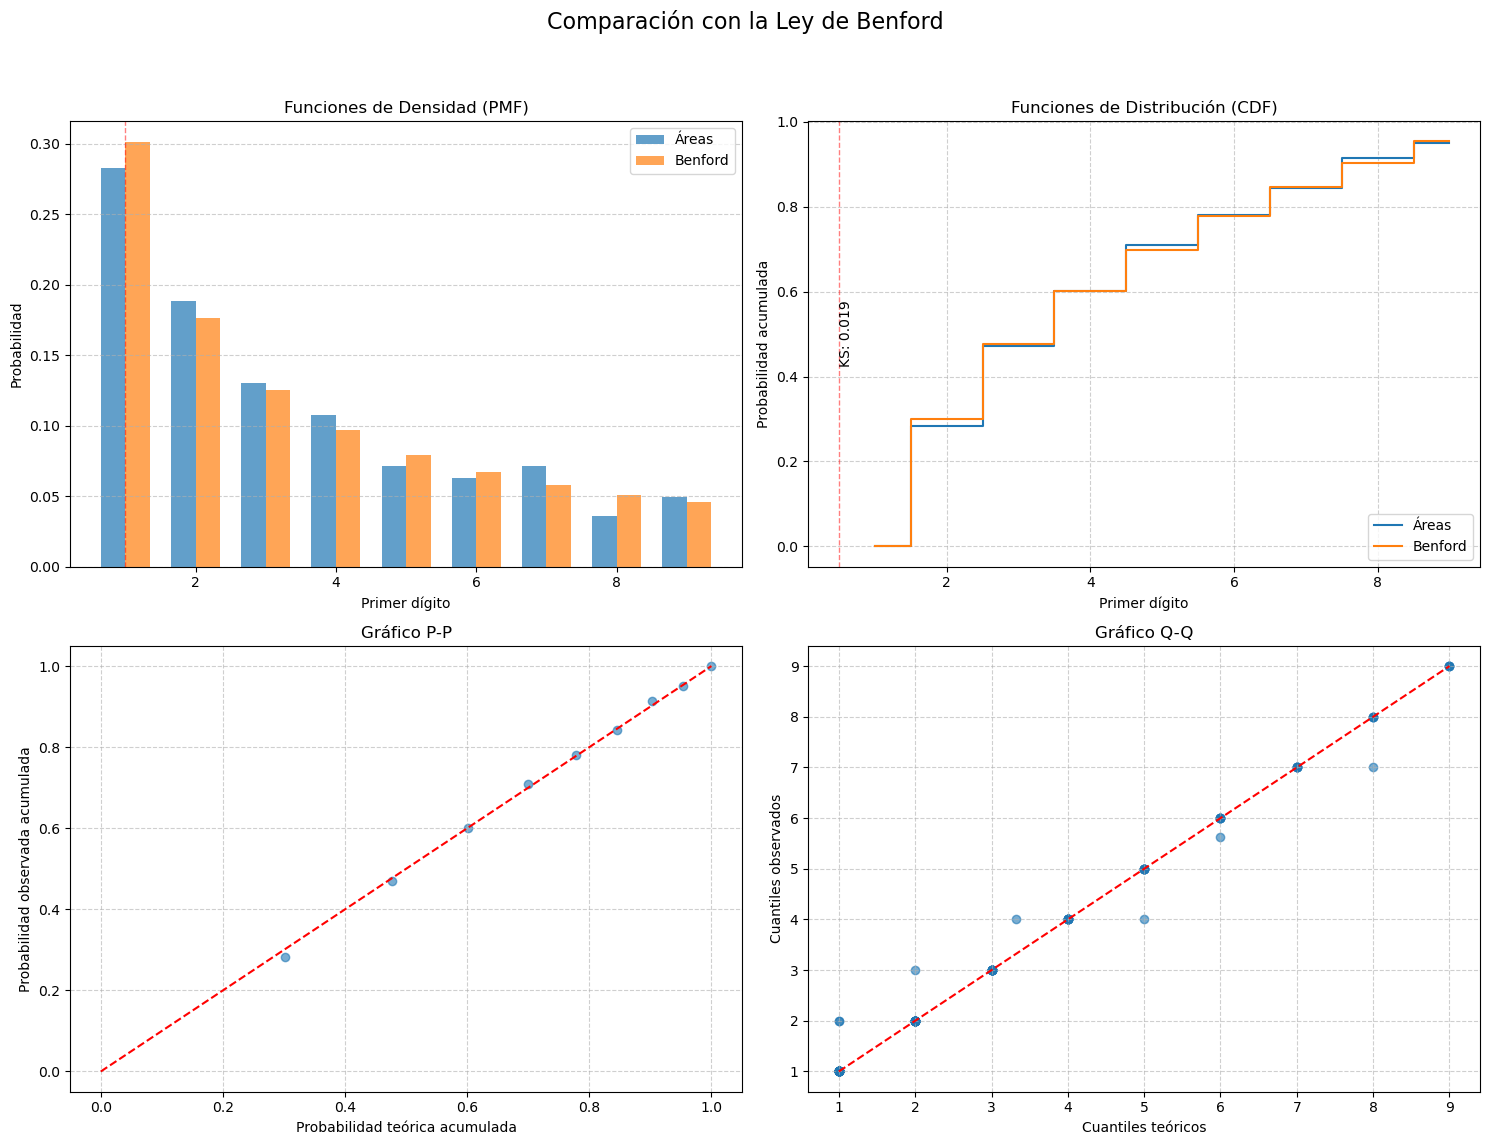

In [98]:
from scipy.stats import rv_discrete, chisquare
from typing import List
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def get_first_digit(number: float) -> int:
    if number == 0:
        return 0
    magnitude = 10**np.floor(np.log10(abs(number)))
    return int(abs(number)/magnitude // 10**np.floor(np.log10(abs(number)/magnitude)))

def benford_distribution(digits: np.ndarray) -> np.ndarray:
    return np.log10(1 + 1/digits)

def compare_samples(sample: np.ndarray, theoretical_cdf: callable, sample_name: str = 'Observado', theoretical_name: str = 'Teórico') -> plt.Figure:
    digits = np.arange(1, 10)
        
    observed_counts = np.bincount(sample, minlength=10)[1:10]
    observed_pmf = observed_counts / len(sample)
    observed_cdf = np.cumsum(observed_pmf)
        
    theoretical_cdf_values = np.array([theoretical_cdf(d) for d in digits])
    theoretical_pmf = np.diff(np.insert(theoretical_cdf_values, 0, 0))
        
    fig, axs = plt.subplots(2, 2, figsize=(15, 12))
    ((ax1, ax2), (ax3, ax4)) = axs
    fig.suptitle('Comparación con la Ley de Benford', fontsize=16)
        
    width = 0.35
    ax1.bar(digits - width/2, observed_pmf, width, label=sample_name, alpha=0.7)
    ax1.bar(digits + width/2, theoretical_pmf, width, label=theoretical_name, alpha=0.7)
    ax1.set_title('Funciones de Densidad (PMF)')
    ax1.set_xlabel('Primer dígito')
    ax1.set_ylabel('Probabilidad')
    ax1.legend()
    ax1.grid(True, axis='y', linestyle='--', alpha=0.6)
        
    ax2.step(digits, np.insert(observed_cdf, 0, 0)[:-1], where='mid', label=sample_name)
    ax2.step(digits, np.insert(theoretical_cdf_values, 0, 0)[:-1], where='mid', label=theoretical_name)
    ax2.set_title('Funciones de Distribución (CDF)')
    ax2.set_xlabel('Primer dígito')
    ax2.set_ylabel('Probabilidad acumulada')
    ax2.legend()
    ax2.grid(True, linestyle='--', alpha=0.6)
        
    differences = np.abs(observed_cdf - theoretical_cdf_values)
    ks_statistic = np.max(differences)
    max_diff_idx = np.argmax(differences)
    d_max = digits[max_diff_idx]
        
    critical_value = 1.36 / np.sqrt(len(sample))
        
    ax1.axvline(d_max, color='r', linestyle='--', linewidth=1, alpha=0.5)
    ax2.axvline(d_max - 0.5, color='r', linestyle='--', linewidth=1, alpha=0.5)
    ax2.text(d_max - 0.5, 0.5, f'KS: {ks_statistic:.3f}', rotation=90, va='center')
        
    ax3.scatter(theoretical_cdf_values, observed_cdf, alpha=0.6)
    ax3.plot([0, 1], [0, 1], 'r--')
    ax3.set_title('Gráfico P-P')
    ax3.set_xlabel('Probabilidad teórica acumulada')
    ax3.set_ylabel('Probabilidad observada acumulada')
    ax3.grid(True, linestyle='--', alpha=0.6)
        
    sample_quantiles = np.quantile(sample, np.linspace(0.01, 0.99, 100))
    theoretical_sample = np.repeat(digits, (theoretical_pmf * 1000).astype(int))
    theoretical_quantiles = np.quantile(theoretical_sample, np.linspace(0.01, 0.99, 100))
    ax4.scatter(theoretical_quantiles, sample_quantiles, alpha=0.6)
    ax4.plot([1, 9], [1, 9], 'r--')
    ax4.set_title('Gráfico Q-Q')
    ax4.set_xlabel('Cuantiles teóricos')
    ax4.set_ylabel('Cuantiles observados')
    ax4.grid(True, linestyle='--', alpha=0.6)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    print("\nResultados de la prueba KS (calculada manualmente):")
    print(f"Estadístico KS: {ks_statistic:.4f}")
    print(f"Valor crítico (α=0.05): {critical_value:.4f}")
    ks_conclusion = "rechaza" if ks_statistic > critical_value else "no rechaza"
    print(f"Conclusión: {ks_conclusion} la hipótesis nula (α=0.05)")
    expected_counts = theoretical_pmf * len(sample)
    chi2_stat, chi2_pvalue = chisquare(observed_counts, expected_counts)
    
    print("\nResultados de la prueba Chi-cuadrado:")
    print(f"Estadístico χ²: {chi2_stat:.4f}")
    print(f"Valor p: {chi2_pvalue:.4f}")
    chi2_conclusion = "rechaza" if chi2_pvalue < 0.05 else "no rechaza"
    print(f"Conclusión: {chi2_conclusion} la hipótesis nula (α=0.05)")
    
    chi2_contributions = (observed_counts - expected_counts)**2 / expected_counts
    print("\nContribuciones individuales al χ²:")
    for digit, contrib in zip(digits, chi2_contributions):
        print(f"Dígito {digit}: {contrib:.4f}")
    
    return fig

if __name__ == "__main__":
    df = pd.read_csv('areas.csv', delimiter=';')
    areas = df['Area in square kilometres'].dropna().astype(float)
    areas = areas[(areas > 0) & (areas.notna())]  
    first_digits = np.array([get_first_digit(x) for x in areas if get_first_digit(x) != 0])
    
    digits = np.arange(1, 10)
    probs = benford_distribution(digits)
    benford_dist = rv_discrete(values=(digits, probs))
    try:
        fig = compare_samples(first_digits, benford_dist.cdf, sample_name='Áreas', theoretical_name='Benford')
        plt.show()
    except ValueError as e:
        print(f"Error: {e}")

### Ejercicio 6

<Figure size 1200x1200 with 0 Axes>

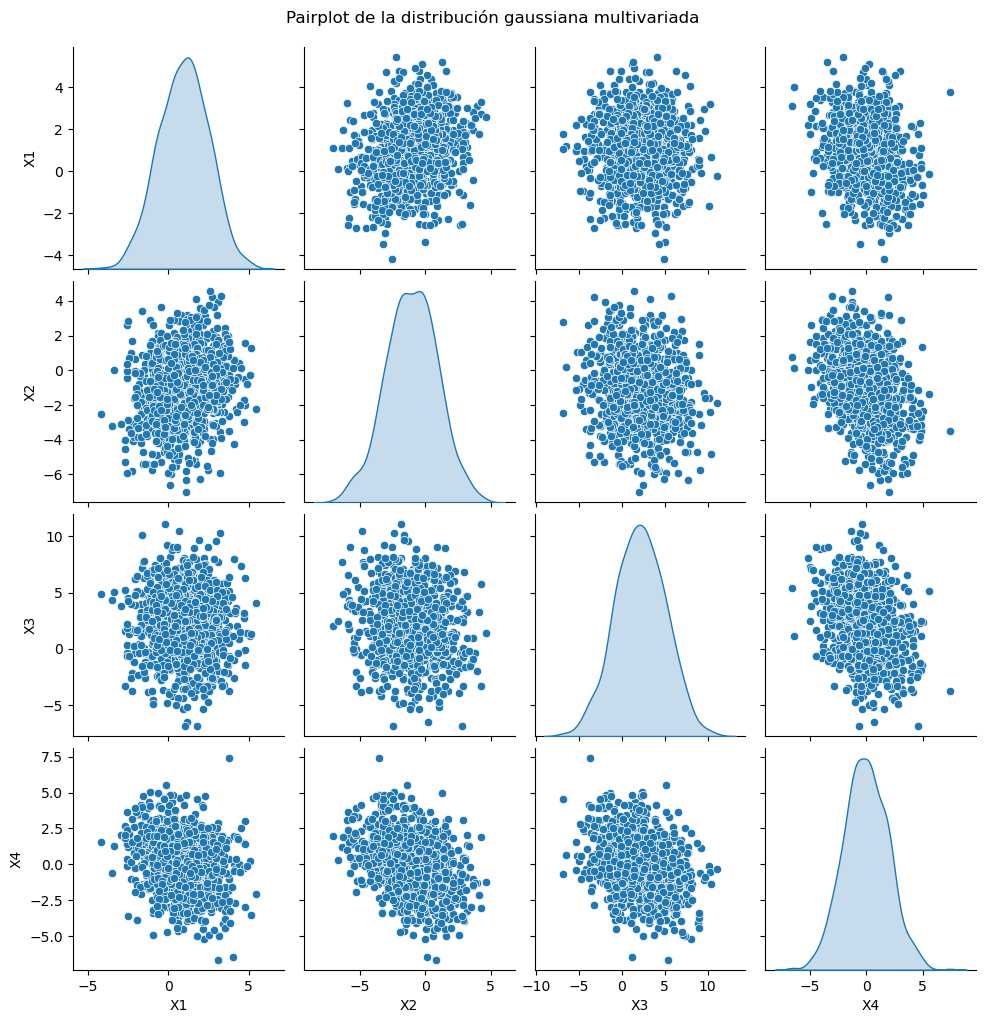


=== ANÁLISIS DE SIMILITUD ===

1. COMPARACIÓN DE MEDIAS
Media teórica: [ 1 -1  2  0]
Media muestral: [ 0.95968311 -1.04040066  2.14343484 -0.05181454]
Error relativo: 0.0665

Prueba T² de Hotelling:
Estadístico F: 0.9170
Valor crítico: 2.3809
p-valor: 0.4532
¿Medias estadísticamente similares? Sí

2. COMPARACIÓN DE COVARIANZAS
Error relativo: 0.0586

Prueba M de Box:
Estadístico M: 5385.0664
Valor crítico: 18.3070
p-valor: 0.0000
¿Covarianzas estadísticamente similares? No


In [109]:
from scipy.stats import multivariate_normal, chi2
from scipy.stats import norm
from scipy.linalg import eigh
from scipy.stats import f

def validar_matriz_covarianza(Sigma):
    if not np.allclose(Sigma, Sigma.T):
        return False
    try:
        np.linalg.cholesky(Sigma)
        return True
    except np.linalg.LinAlgError:
        return False

def comparar_medias(muestra, mu_teorica, Sigma, alpha=0.05):
    n = len(muestra)
    p = len(mu_teorica)
    
    media_muestral = np.mean(muestra, axis=0)
    diff = media_muestral - mu_teorica
    S = np.cov(muestra.T)
    T2 = n * (diff @ np.linalg.solve(S, diff))
    
    F = (n - p) * T2 / (p * (n - 1))
    
    f_crit = f.ppf(1 - alpha, p, n - p)
    
    return {
        'resultado': F <= f_crit,
        'estadistico_F': F,
        'valor_critico': f_crit,
        'p_value': 1 - f.cdf(F, p, n - p)
    }

def comparar_covarianzas(muestra, Sigma_teorica, alpha=0.05):
    n = len(muestra)
    S = np.cov(muestra.T)
    

    _, logdet_S = np.linalg.slogdet(S)
    _, logdet_Sigma = np.linalg.slogdet(Sigma_teorica)
    
    M = (n - 1) * (logdet_S + np.trace(np.linalg.solve(S, Sigma_teorica)) - len(S))
    
    df = p * (p + 1) / 2  
    chi2_crit = chi2.ppf(1 - alpha, df)
    
    return {
        'resultado': M <= chi2_crit,
        'estadistico_M': M,
        'valor_critico': chi2_crit,
        'p_value': 1 - chi2.cdf(M, df)
    }

def generar_y_analizar_gaussiana(n, mu, Sigma, tamaño_muestra=1000):
    mu = np.array(mu)
    Sigma = np.array(Sigma)
    
    if mu.shape[0] != n:
        raise ValueError(f"El vector de medias debe tener dimensión {n}")
    if Sigma.shape != (n, n):
        raise ValueError(f"La matriz de covarianza debe tener dimensión {n}x{n}")
    if not validar_matriz_covarianza(Sigma):
        raise ValueError("La matriz de covarianza debe ser simétrica y definida positiva")
    
    # Generar muestra
    muestra = np.random.multivariate_normal(mu, Sigma, size=tamaño_muestra)
    df = pd.DataFrame(muestra, columns=[f'X{i+1}' for i in range(n)])
    
    plt.figure(figsize=(12, 12))
    sns.pairplot(df, diag_kind='kde')
    plt.suptitle('Pairplot de la distribución gaussiana multivariada', y=1.02)
    plt.show()
    
    media_muestral = np.mean(muestra, axis=0)
    cov_muestral = np.cov(muestra.T)
    
    error_media = np.linalg.norm(media_muestral - mu) / np.linalg.norm(mu)
    error_cov = np.linalg.norm(cov_muestral - Sigma, 'fro') / np.linalg.norm(Sigma, 'fro')
    
    test_medias = comparar_medias(muestra, mu, Sigma)
    test_cov = comparar_covarianzas(muestra, Sigma)
    
    print("\n=== ANÁLISIS DE SIMILITUD ===")
    print("\n1. COMPARACIÓN DE MEDIAS")
    print("Media teórica:", mu)
    print("Media muestral:", media_muestral)
    print(f"Error relativo: {error_media:.4f}")
    print("\nPrueba T² de Hotelling:")
    print(f"Estadístico F: {test_medias['estadistico_F']:.4f}")
    print(f"Valor crítico: {test_medias['valor_critico']:.4f}")
    print(f"p-valor: {test_medias['p_value']:.4f}")
    print(f"¿Medias estadísticamente similares? {'Sí' if test_medias['resultado'] else 'No'}")
    
    print("\n2. COMPARACIÓN DE COVARIANZAS")
    print("Error relativo: {:.4f}".format(error_cov))
    print("\nPrueba M de Box:")
    print(f"Estadístico M: {test_cov['estadistico_M']:.4f}")
    print(f"Valor crítico: {test_cov['valor_critico']:.4f}")
    print(f"p-valor: {test_cov['p_value']:.4f}")
    print(f"¿Covarianzas estadísticamente similares? {'Sí' if test_cov['resultado'] else 'No'}")

p = None 

if __name__ == "__main__":
    n = 4
    mu = [1, -1, 2, 0]
    A = np.random.randn(n, n)
    Sigma = A.T @ A + np.eye(n) * 0.1
    np.fill_diagonal(Sigma, np.abs(np.diag(Sigma)) + 1)
    
    p = n 
    generar_y_analizar_gaussiana(n, mu, Sigma)